In [1]:
import numpy as np
import pandas as pd
import os
os.chdir(r"C:\Users\sam\CODEs\MedLegit")  #add your own directory
data_dir = "data/"
dfs = []
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/Test-1542969243754.csv
data/Test_Beneficiarydata-1542969243754.csv
data/Test_Inpatientdata-1542969243754.csv
data/Test_Outpatientdata-1542969243754.csv
data/Train-1542865627584.csv
data/Train_Beneficiarydata-1542865627584.csv
data/Train_Inpatientdata-1542865627584.csv
data/Train_Outpatientdata-1542865627584.csv


In [21]:
#!pip install numpy==1.26.4 scipy==1.13.0 fsspec==2025.3.0 nltk==3.2.4 matplotlib==3.8.0 pandas==2.2.2 rich==13.5.2 google-auth==2.38.0 notebook==6.5.7 google-api-core==2.10.2 gymnasium==1.0.0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_ben_df= pd.read_csv(r"data\Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv(r"data\Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv(r"data\Train_Outpatientdata-1542865627584.csv")
train_df    = pd.read_csv(r"data\Train-1542865627584.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [5]:
train_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [6]:
train_ben_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
train_ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [8]:
train_op_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [9]:
# Combine inpatient and outpatient claims
claims = pd.concat([train_ip_df, train_op_df], ignore_index=True)
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   AdmissionDt             40474 non-null   object 
 10  ClmAdmitDiagnosisCode   145899 non-null  object 
 11  DeductibleAmtPaid       557312 non-null  float64
 12  DischargeDt             40474 non-null   object 
 13  DiagnosisGroupCode      40474 non-null   object 
 14  ClmDiagnosisCode_1  

In [10]:
# Merge with beneficiary data
claims = claims.merge(train_ben_df, on='BeneID', how='left')
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [11]:
fraud_providers=train_df[train_df['PotentialFraud']=='Yes']['Provider']

In [12]:

claims['PotentialFraud'] = claims['Provider'].isin(fraud_providers).astype(int)


In [13]:
claims['PotentialFraud'].unique()

array([1, 0])

In [14]:
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

Distribution of Potential Fraud class:- 
 PotentialFraud
0    61.878931
1    38.121069
Name: count, dtype: float64


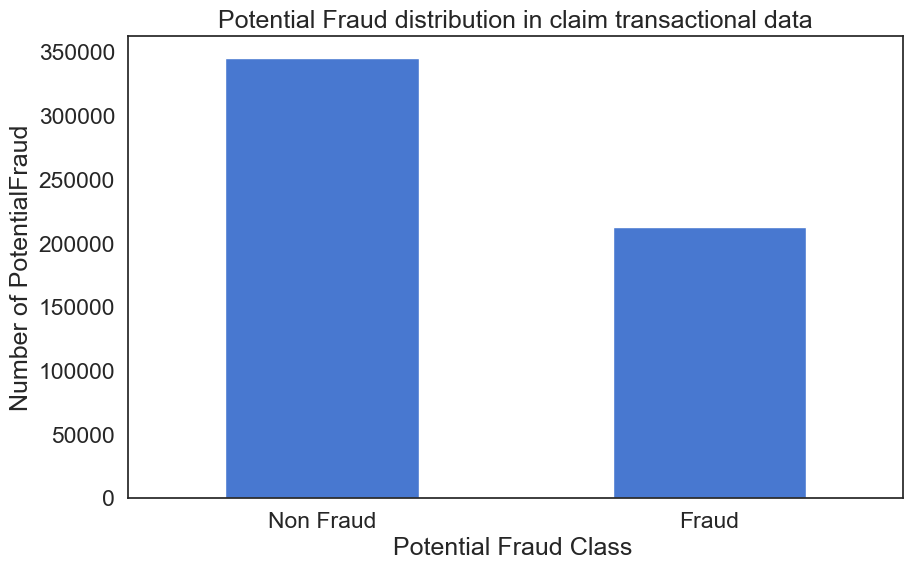

In [15]:
sns.set_style('white',rc={'figure.figsize':(10,6)})
count_classes = claims['PotentialFraud'].value_counts(sort=True)

print("Distribution of Potential Fraud class:- \n",count_classes*100/len(claims))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud")

plt.savefig('PotentialFraudDistribution')

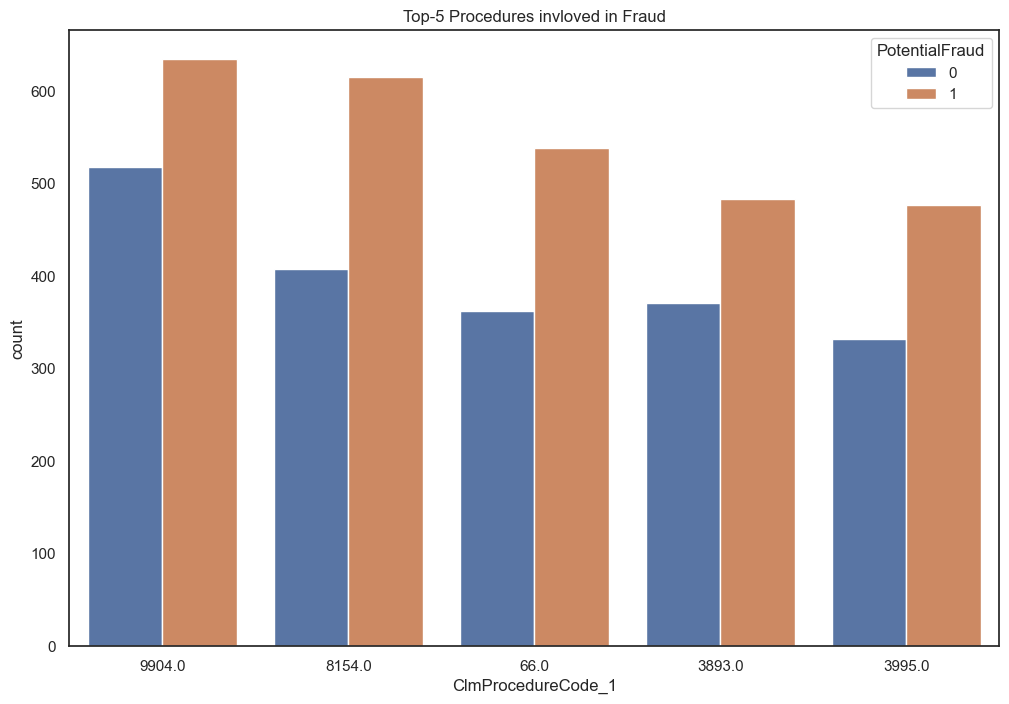

<Figure size 1200x800 with 0 Axes>

In [16]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=claims
              ,order=claims.ClmProcedureCode_1.value_counts().iloc[:5].index)

plt.title('Top-5 Procedures invloved in Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinMedicalFraud')

In [17]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [18]:
claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,0


In [19]:
claims['AdmissionDt'] = pd.to_datetime(claims['AdmissionDt'])
claims['DischargeDt'] = pd.to_datetime(claims['DischargeDt'])
claims['ClaimStartDt'] = pd.to_datetime(claims['ClaimStartDt'])


In [20]:
claims[['BeneID','ClaimID','ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt']].head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,2009-04-12,2009-04-18
1,BENE11001,CLM66048,2009-08-31,2009-09-02,2009-08-31,2009-09-02
2,BENE11001,CLM68358,2009-09-17,2009-09-20,2009-09-17,2009-09-20
3,BENE11011,CLM38412,2009-02-14,2009-02-22,2009-02-14,2009-02-22
4,BENE11014,CLM63689,2009-08-13,2009-08-30,2009-08-13,2009-08-30


In [21]:
# Claim duration
claims['ClaimDuration'] = (claims['DischargeDt'] - claims['AdmissionDt']).dt.days

In [22]:
claims[['BeneID','ClaimID','ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','ClaimDuration']].head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,ClaimDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,2009-04-12,2009-04-18,6.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,2009-08-31,2009-09-02,2.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,2009-09-17,2009-09-20,3.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,2009-02-14,2009-02-22,8.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,2009-08-13,2009-08-30,17.0


In [23]:
# Number of procedures and diagnoses
claims['NumDiagnosis'] = claims[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']].notnull().sum(axis=1)
claims['NumProcedure'] = claims[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']].notnull().sum(axis=1)

In [24]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            145899 non-

In [25]:
claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimDuration,NumDiagnosis,NumProcedure
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,1,6.0,9,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,36000,3204,60,70,0,2.0,3,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,0,3.0,6,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,0,8.0,9,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,2,21260,2136,120,100,0,17.0,9,1


Average procedure count per patient: 0.21576835358988422


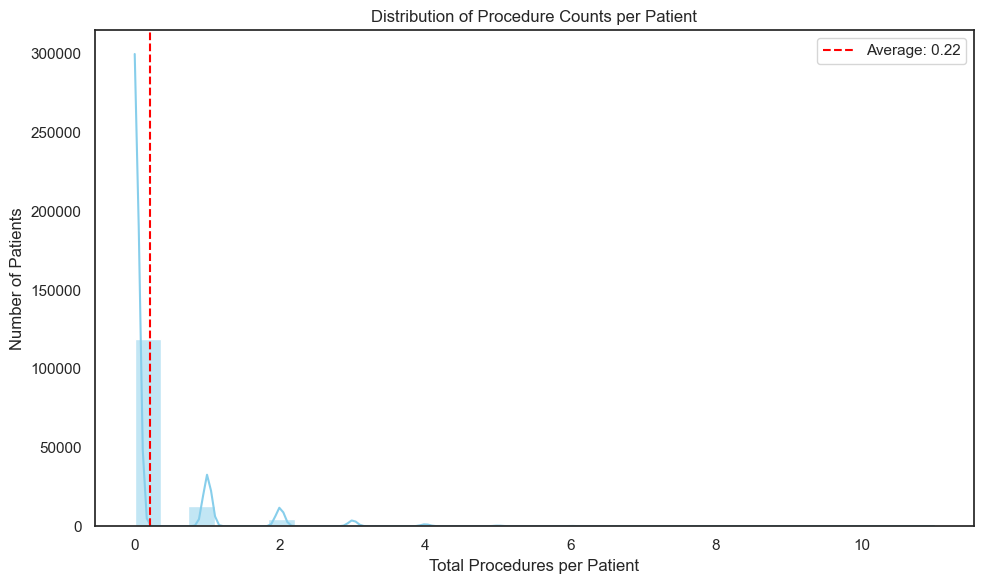

In [26]:
import matplotlib.pyplot as plt
#Average procedure count per patient

ben_procedure_count = claims.groupby('BeneID')['NumProcedure'].sum()
ben_procedure_avg = ben_procedure_count.mean()
print("Average procedure count per patient:", ben_procedure_avg)

plt.figure(figsize=(10, 6))
sns.histplot(ben_procedure_count, bins=30, kde=True, color='skyblue')

plt.axvline(ben_procedure_avg, color='red', linestyle='--', label=f'Average: {ben_procedure_avg:.2f}')
plt.title('Distribution of Procedure Counts per Patient')
plt.xlabel('Total Procedures per Patient')
plt.ylabel('Number of Patients')
plt.legend()
plt.tight_layout()
plt.show()

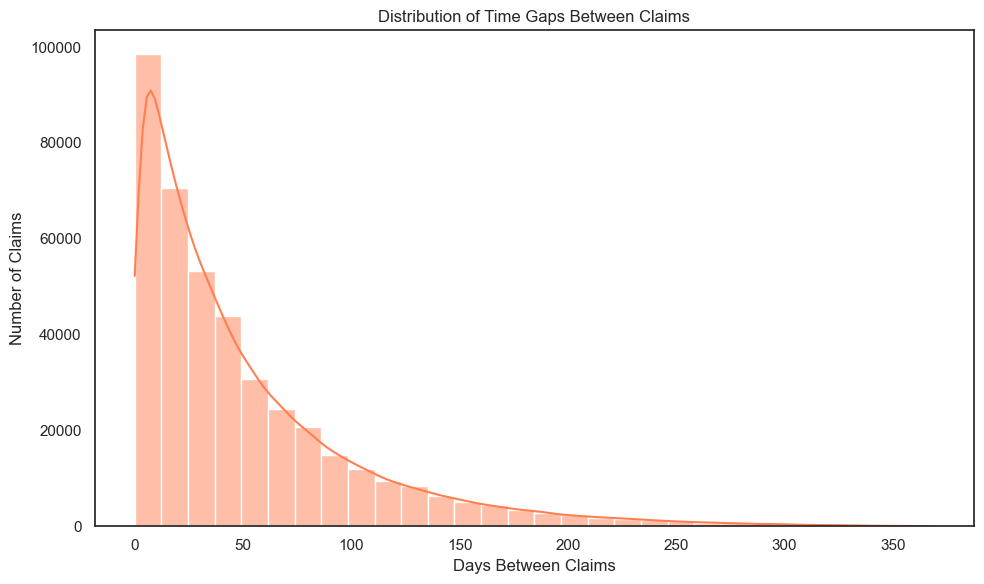

In [27]:
# Time gaps between claims

claims_sorted = claims.sort_values(['BeneID', 'ClaimStartDt'])

# Calculate time gap between consecutive claims per patient
claims_sorted['TimeGap'] = claims_sorted.groupby('BeneID')['ClaimStartDt'].diff().dt.days

plt.figure(figsize=(10, 6))
sns.histplot(claims_sorted['TimeGap'].dropna(), bins=30, kde=True, color='coral')

plt.title('Distribution of Time Gaps Between Claims')
plt.xlabel('Days Between Claims')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

In [28]:
diagnosis_cols = [col for col in claims.columns if col.startswith('ClmDiagnosisCode_')]
diagnosis_long = claims.melt(id_vars=['ClaimID', 'BeneID'], value_vars=diagnosis_cols, 
                             var_name='DiagnosisSlot', value_name='DiagnosisCode')

# Drop missing codes
diagnosis_long = diagnosis_long.dropna(subset=['DiagnosisCode'])

# Count how many claims each diagnosis appears in
diagnosis_counts = diagnosis_long.groupby('DiagnosisCode')['ClaimID'].nunique().reset_index()
diagnosis_counts.columns = ['DiagnosisCode', 'ClaimFrequency']

# Merge back to flag claims with repeated diagnoses
diagnosis_long = diagnosis_long.merge(diagnosis_counts, on='DiagnosisCode', how='left')
diagnosis_long['RepeatedDiagnosisFlag'] = (diagnosis_long['ClaimFrequency'] > 1).astype(int)

# Optional: Aggregate back to claim level
diagnosis_flags = diagnosis_long.groupby('ClaimID')['RepeatedDiagnosisFlag'].max().reset_index()
claims = claims.merge(diagnosis_flags, on='ClaimID', how='left')

In [29]:
# Avoid division by zero
claims['ClaimDuration'] = claims['ClaimDuration'].replace(0, np.nan)

# Calculate ratio
claims['ReimbToDurationRatio'] = claims['InscClaimAmtReimbursed'] / claims['ClaimDuration']

In [30]:
claims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimDuration,NumDiagnosis,NumProcedure,RepeatedDiagnosisFlag,ReimbToDurationRatio
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,36000,3204,60,70,1,6.0,9,0,1.0,4333.333333
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,36000,3204,60,70,0,2.0,3,1,1.0,2500.000000
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,36000,3204,60,70,0,3.0,6,0,1.0,1666.666667
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,5000,1068,250,320,0,8.0,9,1,1.0,625.000000
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,21260,2136,120,100,0,17.0,9,1,1.0,588.235294


In [35]:
# Select useful features for fraud detection
features = [
    'ClaimDuration',
    'NumDiagnosis',
    'NumProcedure',
    'RepeatedDiagnosisFlag',
    'ReimbToDurationRatio',
    'InscClaimAmtReimbursed',
    'IPAnnualReimbursementAmt',
    'OPAnnualReimbursementAmt'
]

# Handle missing values
X = claims[features].fillna(0)

# Target variable
y = claims['PotentialFraud']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [39]:
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    random_state=42,
    class_weight="balanced"  # important for fraud (imbalanced data)
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [41]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [42]:
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Random Forest Results:
[[65155  3928]
 [37498  5062]]
              precision    recall  f1-score   support

           0     0.6347    0.9431    0.7588     69083
           1     0.5631    0.1189    0.1964     42560

    accuracy                         0.6289    111643
   macro avg     0.5989    0.5310    0.4776    111643
weighted avg     0.6074    0.6289    0.5444    111643

ROC-AUC: 0.5432537857438895


In [44]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), # handle imbalance
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Results:
[[50525 18558]
 [27964 14596]]
              precision    recall  f1-score   support

           0     0.6437    0.7314    0.6848     69083
           1     0.4402    0.3430    0.3856     42560

    accuracy                         0.5833    111643
   macro avg     0.5420    0.5372    0.5352    111643
weighted avg     0.5662    0.5833    0.5707    111643

ROC-AUC: 0.5558403424005928


In [59]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate_thresholds(y_true, y_proba, model_name):
    print(f"\n{model_name} Threshold Tuning:")
    for thr in [0.1, 0.2, 0.3, 0.4, 0.5]:
        y_pred = (y_proba >= thr).astype(int)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        print(f"Thr={thr:.1f} | Precision={prec:.3f} | Recall={rec:.3f}")

evaluate_thresholds(y_test, y_prob_xgb, "XGBoost")
evaluate_thresholds(y_test, y_prob, "Random Forest")



XGBoost Threshold Tuning:
Thr=0.1 | Precision=0.381 | Recall=1.000
Thr=0.2 | Precision=0.381 | Recall=1.000
Thr=0.3 | Precision=0.382 | Recall=0.997
Thr=0.4 | Precision=0.385 | Recall=0.976
Thr=0.5 | Precision=0.440 | Recall=0.343

Random Forest Threshold Tuning:
Thr=0.1 | Precision=0.381 | Recall=1.000
Thr=0.2 | Precision=0.381 | Recall=1.000
Thr=0.3 | Precision=0.381 | Recall=1.000
Thr=0.4 | Precision=0.381 | Recall=1.000
Thr=0.5 | Precision=0.563 | Recall=0.119


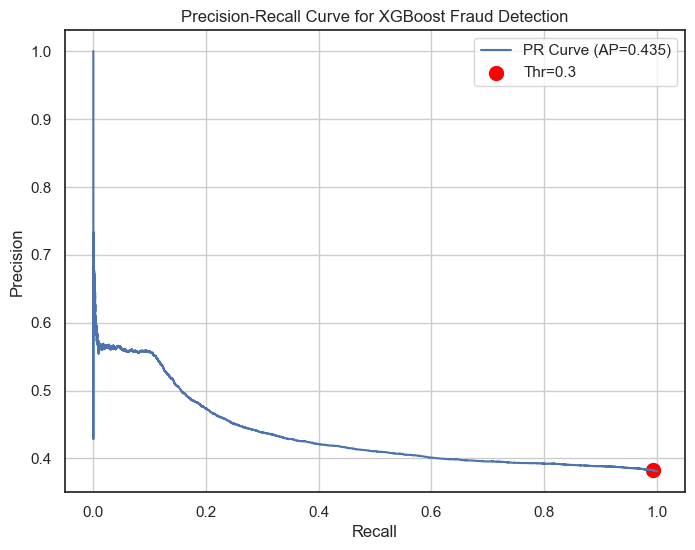

In [61]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = xgb.predict_proba(X_test)[:, 1]

# Compute precision, recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute Average Precision (area under PR curve)
ap = average_precision_score(y_test, y_proba)

# Plot PR Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AP={ap:.3f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for XGBoost Fraud Detection")
plt.legend()
plt.grid(True)

# Mark threshold=0.3 on the curve
thr = 0.3
# find nearest threshold index
thr_idx = (abs(thresholds - thr)).argmin()
plt.scatter(recall[thr_idx], precision[thr_idx], color='red', s=100, label=f"Thr={thr}")
plt.legend()

plt.show()